In [137]:
# pip install -r requirements.txt

Вначале импортируем основные библиотеки для работы с данными

In [138]:
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков
import warnings

# Отключение варнингов - лишние предупреждения
warnings.filterwarnings("ignore")

# Настройка палитры seaborn для задания стиля графиков
sns.set_palette('cubehelix')

Дата сет представляет собой файл формата csv, сжатым в архив формата zip.

In [139]:
df = pd.read_csv("data_despair_139_v20241014.zip", compression="zip", sep=";")  # Прямо из zip

Для первичного анализа датасета отобразим несколько строк

In [140]:
display(df.sample(10)) # показываем первые 6 строк
pd.set_option('display.max_columns', None) # для показа всех колонок

,indicator_name,object_level,object_name,okato,oktmo,year,age,settlement_type,gender,reason_code,reason_name,indicator_value,indicator_unit
490896,Число умерших,Регион,Белгородская область,14000000,14000000,2021,45-49 лет,U,M,293,"Воздействие дымом, огнем и пламенем с неопреде...",0,Человек
121131,Число умерших,Регион,Приморский край,5000000,5000000,2019,50-54 лет,R,F,290,"Повешение, удушение и удавление с неопределенн...",0,Человек
333554,Число умерших,Регион,Кировская область,33000000,33000000,2020,60-64 лет,R,F,286,Отравление и воздействие медикаментами с неопр...,0,Человек
892168,Число умерших,Регион,Еврейская автономная область,99000000,99000000,2023,50-54 лет,T,M,297,Уточненные и неуточненные повреждения с неопре...,0,Человек
380763,Число умерших,Регион,Республика Башкортостан,80000000,80000000,2020,85 и более лет,R,M,286,Отравление и воздействие медикаментами с неопр...,0,Человек
99171,Число умерших,Регион,Республика Алтай,84000000,84000000,2019,40-44 лет,U,F,290,"Повешение, удушение и удавление с неопределенн...",0,Человек
889289,Число умерших,Федеральный округ,Уральский федеральный округ,0,0,2023,50-54 лет,R,F,291,Погружение в воду и утопление с неопределенным...,0,Человек
432873,Число умерших,Регион,Сахалинская область,64000000,64000000,2021,10-14 лет,U,F,291,Погружение в воду и утопление с неопределенным...,1,Человек
99753,Число умерших,Регион,Иркутская область,25000000,25000000,2019,40-44 лет,R,F,296,Авария моторного транспортного средства с неоп...,0,Человек
523989,Число умерших,Регион,Кабардино-Балкарская Республика,83000000,83000000,2021,60-64 лет,R,F,287,Отравление и воздействие наркотиками и психоди...,0,Человек


In [141]:
df.shape # из чего состоит дф

(968720, 13)

Для дальнейшего анализа датасета уменьшим количество строк и уберем некоторые параметры. Исследует атрибуты `age`, `object_level`, `settlement_type`.

Отфильтрованный дата сет поместим в новую переменную `df_filtered`.

In [142]:
df_filtered = df

В возрасте есть категория "Всего". Для анализа мы не будем учитывать это значение. Кроме того, было принято решение взять следующую исследуемую группу: возраст от 10 до 84 лет включительно.

In [143]:
df["age"].value_counts()

age
до 1 года          48436
1-4 года           48436
5-9 лет            48436
10-14 лет          48436
15-19 лет          48436
20-24 года         48436
25-29 лет          48436
30-34 лет          48436
35-39 лет          48436
40-44 лет          48436
45-49 лет          48436
50-54 лет          48436
55-59 лет          48436
60-64 лет          48436
65-69 лет          48436
70-74 лет          48436
75-79 лет          48436
80-84 лет          48436
85 и  более лет    48436
Всего              48436
Name: count, dtype: int64

In [144]:
df_filtered = df_filtered[~df_filtered["age"].isin(['до 1 года', '1-4 года', '5-9 лет', '85 и  более лет', 'Всего'])]

Посмотрим атрибут `object_level`. Атрибут содержит три категории: регион, федеральный округ и страна. Дальшейнее анализ будет проводиться по наиболее маленькому уровню объектов, то есть только по регионам.

In [145]:
df["object_level"].value_counts()

object_level
Регион               875840
Федеральный округ     82560
Страна                10320
Name: count, dtype: int64

In [146]:
df_filtered = df_filtered[df_filtered["object_level"] == "Регион"]

Атрибут `settlement_type`. Атрибут содержит три категории: U (городская местность), R (сельская местность) и T (общее). В дальнейшем анализе не будем брать во внимание категорию T.

In [147]:
df["settlement_type"].value_counts()

settlement_type
U    323360
T    323360
R    322000
Name: count, dtype: int64

In [148]:
df_filtered = df_filtered[df_filtered["settlement_type"] != "T"]

In [163]:
df_filtered.shape

(437580, 13)

In [149]:
df_filtered = df[
    (~df["age"].isin(["до 1 года", "1-4 года", "5-9 лет", "85 и  более лет", "Всего"])) &
    (df["object_level"] == "Регион") &
    (df["settlement_type"] != "T")  
]

In [150]:
df_filtered.shape

(437580, 13)

In [151]:
df.info() # выводит всю информацию по дф (кол-во ненулевых значений и тип данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968720 entries, 0 to 968719
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   indicator_name   968720 non-null  object
 1   object_level     968720 non-null  object
 2   object_name      968720 non-null  object
 3   okato            968720 non-null  int64 
 4   oktmo            968720 non-null  int64 
 5   year             968720 non-null  int64 
 6   age              968720 non-null  object
 7   settlement_type  968720 non-null  object
 8   gender           968720 non-null  object
 9   reason_code      968720 non-null  int64 
 10  reason_name      968720 non-null  object
 11  indicator_value  968720 non-null  int64 
 12  indicator_unit   968720 non-null  object
dtypes: int64(5), object(8)
memory usage: 96.1+ MB


In [152]:
df["indicator_value"].value_counts() # считаем кол-во каждого из значений в статусе

indicator_value
0       714644
1        88831
2        38443
3        22505
4        15129
         ...  
940          1
3036         1
1052         1
1302         1
1209         1
Name: count, Length: 1208, dtype: int64

In [153]:
df.groupby('reason_name')['indicator_value'].sum().sort_values(ascending=False)


reason_name
Контакт с острым и тупым предметом с неопределенными намерениями                                                                                     921094
Другие преднамеренные самоповреждения (включая самоубийство)                                                                                         895108
Случайное отравление (воздействие) алкоголем                                                                                                         552740
Повешение, удушение и удавление с неопределенными намерениями                                                                                        462166
Прочие отравления с неопределенными намерениями                                                                                                      300686
Случайное отравление и воздействие наркотиками и психодислептиками (галлюциногенами)                                                                 263864
Падение, прыжок или сталкивание с высоты с неопредел

In [154]:
df.groupby('gender')['indicator_value'].sum()


gender
F     913642
M    3494722
Name: indicator_value, dtype: int64

In [155]:
df.groupby('age')['indicator_value'].sum()

age
1-4 года              4292
10-14 лет            11584
15-19 лет            41134
20-24 года           65894
25-29 лет           105000
30-34 лет           206038
35-39 лет           266734
40-44 лет           265704
45-49 лет           223834
5-9 лет               3464
50-54 лет           182666
55-59 лет           190584
60-64 лет           188232
65-69 лет           141948
70-74 лет           100028
75-79 лет            55150
80-84 лет            75136
85 и  более лет      69032
Всего              2209356
до 1 года             2554
Name: indicator_value, dtype: int64

In [156]:
df[(df['year'] == 2022) & df['indicator_value']  > 0]

,indicator_name,object_level,object_name,okato,oktmo,year,age,settlement_type,gender,reason_code,reason_name,indicator_value,indicator_unit
586570,Число умерших,Страна,Российская Федерация,0,0,2022,до 1 года,U,M,291,Погружение в воду и утопление с неопределенным...,5,Человек
586572,Число умерших,Страна,Российская Федерация,0,0,2022,до 1 года,U,M,293,"Воздействие дымом, огнем и пламенем с неопреде...",1,Человек
586576,Число умерших,Страна,Российская Федерация,0,0,2022,до 1 года,U,M,297,Уточненные и неуточненные повреждения с неопре...,1,Человек
586585,Число умерших,Страна,Российская Федерация,0,0,2022,до 1 года,U,F,289,Прочие отравления с неопределенными намерениями,1,Человек
586587,Число умерших,Страна,Российская Федерация,0,0,2022,до 1 года,U,F,291,Погружение в воду и утопление с неопределенным...,1,Человек
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777627,Число умерших,Регион,Чукотский автономный округ,77000000,77000000,2022,Всего,T,F,284,Другие преднамеренные самоповреждения (включая...,1,Человек
777630,Число умерших,Регион,Чукотский автономный округ,77000000,77000000,2022,Всего,T,F,288,Отравление и воздействие алкоголем с неопредел...,3,Человек
777633,Число умерших,Регион,Чукотский автономный округ,77000000,77000000,2022,Всего,T,F,291,Погружение в воду и утопление с неопределенным...,1,Человек
777635,Число умерших,Регион,Чукотский автономный округ,77000000,77000000,2022,Всего,T,F,293,"Воздействие дымом, огнем и пламенем с неопреде...",1,Человек


In [157]:
df.groupby('year')['indicator_value'].sum()

year
2019    875318
2020    916652
2021    905552
2022    865166
2023    845676
Name: indicator_value, dtype: int64

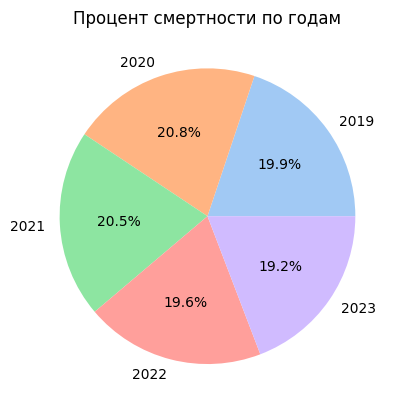

In [158]:
sns.set_palette('pastel')
year_death = df.groupby('year')['indicator_value'].sum()
plt.pie(year_death, labels=year_death.index, autopct='%1.1f%%')
plt.title('Процент смертности по годам')
plt.show()

In [159]:
# Группировка по возрасту и полу и подсчет суммы смертей
result = df.groupby(['year', 'gender'])['indicator_value'].sum().reset_index()

# Отображение результата
display(result)

,year,gender,indicator_value
0,2019,F,183232
1,2019,M,692086
2,2020,F,190688
3,2020,M,725964
4,2021,F,187450
5,2021,M,718102
6,2022,F,176884
7,2022,M,688282
8,2023,F,175388
9,2023,M,670288


In [160]:
# Группировка по возрасту и полу и подсчет суммы смертей
result = df.groupby(['age', 'gender'])['indicator_value'].sum().reset_index()

# Отображение результата
display(result)

,age,gender,indicator_value
0,1-4 года,F,1702
1,1-4 года,M,2590
2,10-14 лет,F,4842
3,10-14 лет,M,6742
4,15-19 лет,F,11498
5,15-19 лет,M,29636
6,20-24 года,F,12108
7,20-24 года,M,53786
8,25-29 лет,F,14670
9,25-29 лет,M,90330


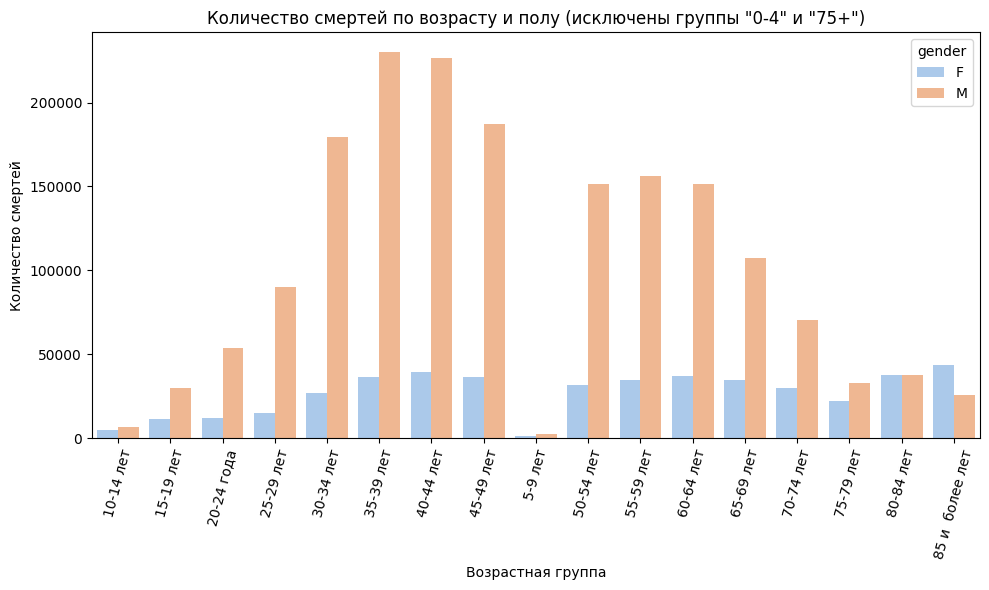

In [161]:
# Исключаем возрастные группы "0-4" и "75+" 
filtered_df = df[~df['age'].isin(['1-4 года', 'Всего', 'до 1 года'])]

# Группируем данные по возрасту и полу
result = filtered_df.groupby(['age', 'gender'])['indicator_value'].sum().reset_index()

# Построение графика
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='indicator_value', hue='gender', data=result)

plt.xlabel('Возрастная группа')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по возрасту и полу (исключены группы "0-4" и "75+")')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [162]:
df.groupby(['reason_name'])['indicator_value'].sum().reset_index().sort_values('indicator_value', ascending=False).head(5)


,reason_name,indicator_value
3,Контакт с острым и тупым предметом с неопредел...,921094
2,Другие преднамеренные самоповреждения (включая...,895108
15,Случайное отравление (воздействие) алкоголем,552740
8,"Повешение, удушение и удавление с неопределенн...",462166
13,Прочие отравления с неопределенными намерениями,300686
